In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [2]:
from matplotlib.colors import ListedColormap

In [84]:
from IPython.display import display
from ipywidgets import IntSlider

In [85]:
%matplotlib notebook

In [3]:
!pip install scikit-learn

You should consider upgrading via the 'D:\venvs\ml310venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
from sklearn.model_selection import train_test_split

In [4]:
#lx1 = [randint(70,100) for _ in range(42)]
#ly1 = [randint(0,100) for _ in range(42)]
#list(zip(lx1,ly1))
#x2 = [randint(0,50) for _ in range(42)]
#y2 = [randint(0,45) for _ in range(42)]

[(91, 15),
 (86, 93),
 (87, 65),
 (84, 39),
 (94, 86),
 (71, 84),
 (96, 74),
 (99, 91),
 (73, 20),
 (84, 7),
 (82, 86),
 (87, 97),
 (82, 94),
 (70, 91),
 (83, 29),
 (84, 16),
 (92, 72),
 (79, 67),
 (94, 36),
 (95, 24),
 (84, 3),
 (97, 14),
 (71, 11),
 (95, 53),
 (83, 11),
 (95, 7),
 (74, 33),
 (73, 70),
 (76, 56),
 (83, 26),
 (76, 16),
 (79, 19),
 (86, 98),
 (87, 4),
 (92, 26),
 (73, 5),
 (74, 77),
 (81, 90),
 (75, 100),
 (99, 23),
 (95, 46),
 (93, 40)]

In [34]:
rgen = np.random.RandomState(1)

x1 = rgen.normal(loc=50.0,scale=10.0, size= 42)
y1 = rgen.normal(loc=50.0,scale=18.0, size= 42)

x2 = rgen.normal(loc=30.0,scale=8.0, size= 42)
y2 = rgen.normal(loc=30.0,scale=8.0, size= 42)
k1 = np.array([x1, y1])
k2 = np.array([x2, y2])


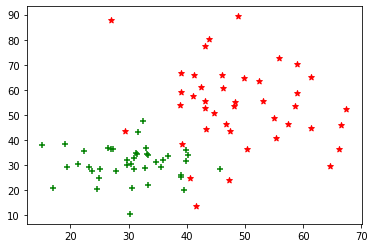

In [35]:
plt.scatter(k1[0], k1[1],  color='red', marker='*', label='class 1')
plt.scatter(k2[0], k2[1],  color='green', marker='+', label='class 2')
#plt.axis('off')
plt.show()


In [15]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0,scale=0.01, size= 1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                
                self.w_[1:] += update * xi
                self.w_[0] += update 
                
                errors += int( update != 0.0)
                
            self.errors_.append(errors)
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] # w_[0] нейрон смещения
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [36]:
kg1 = k1.copy()
kg2 = k2.copy()
k1 = k1.T
k2 = k2.T

In [37]:

X = np.zeros( (84,2) )
X[:42] = k1
X[42:] = k2
#X /= 100 


In [38]:
# это тест не запускать
#rgen = np.random.RandomState(1)
#w_ = rgen.normal(loc=0.0,scale=0.01, size=X.shape[1])
#np.dot(X[0], w_)
#w_

In [39]:
y = np.ones( (84), dtype=int )
y[:42] = -1


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.02, random_state=1, stratify=y )


In [187]:
#X.shape

(84, 2)

In [80]:
ppn = Perceptron( eta=0.01, n_iter=10000, random_state=1)

In [81]:
ppn.fit(X_train,y_train)

In [71]:
ppn.errors_

[38,
 37,
 38,
 41,
 36,
 38,
 39,
 36,
 34,
 38,
 39,
 39,
 35,
 35,
 35,
 42,
 38,
 39,
 39,
 41,
 36,
 36,
 38,
 39,
 36,
 39,
 36,
 36,
 38,
 39,
 36,
 39,
 36,
 35,
 39,
 36,
 35,
 35,
 39,
 34,
 38,
 41,
 41,
 41,
 39,
 30,
 38,
 41,
 38,
 41,
 41,
 41,
 38,
 35,
 39,
 38,
 42,
 41,
 38,
 42,
 41,
 38,
 41,
 39,
 41,
 41,
 38,
 41,
 41,
 41,
 41,
 41,
 38,
 35,
 41,
 41,
 37,
 17,
 35,
 28,
 41,
 41,
 37,
 27,
 39,
 40,
 38,
 40,
 37,
 40,
 37,
 38,
 38,
 40,
 41,
 41,
 38,
 38,
 39,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 36,
 24,
 24,
 27,
 38,
 38,
 28,
 30,
 27,
 30,
 30,
 28,
 27,
 27,
 35,
 24,
 24,
 27,
 38,
 37,
 28,
 30,
 27,
 33,
 35,
 32,
 35,
 24,
 27,
 32,
 35,
 24,
 24,
 27,
 32,
 37,
 32,
 27,
 32,
 37,
 34,
 32,
 27,
 27,
 33,
 28,
 32,
 33,
 32,
 38,
 32,
 27,
 32,
 37,
 34,
 33,
 30,
 27,
 33,
 33,
 29,
 27,
 32,
 31,
 33,
 30,
 25,
 19,
 27,
 28,
 33,
 20,
 33,
 20,
 33,
 25,
 19,
 30,
 37,
 30,
 18,
 35,
 26,
 27,
 34,
 36,
 28,
 33,
 19,
 30,


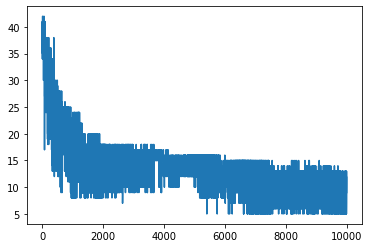

In [82]:
plt.plot(range(1, len(ppn.errors_)+ 1), ppn.errors_ )
plt.show()

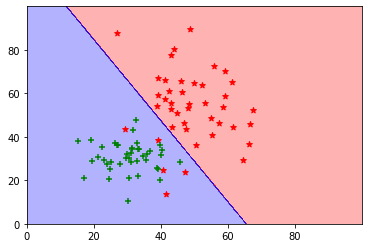

In [83]:
x1_min, x1_max = 0,100
x2_min, x2_max = 0,100
resol = 0.1

cmap = ListedColormap(['red', 'blue'])

xx1, xx2 = np.meshgrid(
                       np.arange(x1_min, x1_max, resol), 
                       np.arange(x2_min, x2_max, resol) 
                      )
Z = ppn.predict(
                np.array([xx1.ravel(), xx2.ravel()] ).T
                )
Z = Z.reshape(xx1.shape)

plt.contourf( xx1, xx2, Z, alpha=0.3, cmap=cmap )
plt.scatter(kg1[0], kg1[1],  color='red', marker='*', label='class 1')
plt.scatter(kg2[0], kg2[1],  color='green', marker='+', label='class 2')
#plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


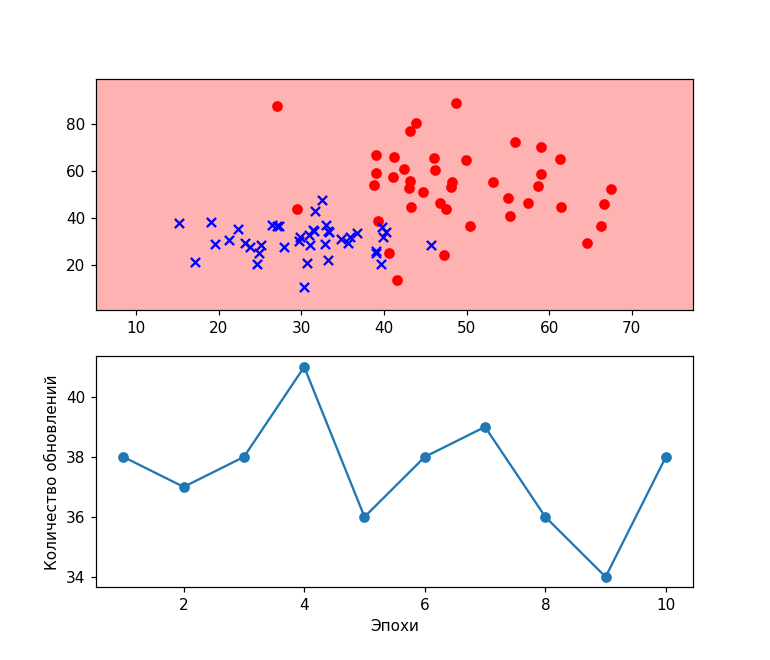

In [89]:
fig, axs = plt.subplots(2, 1, figsize=(7, 6))
def draw_graph(X, y, n_iter, ):
    
    axs[0].clear()
    axs[1].clear()
    ppn = Perceptron( eta=0.01, n_iter=n_iter, random_state=1)
    ppn.fit(X,y)
    x_, y_ = np.meshgrid(
                        np.arange( X[:,0].min()-10, X[:, 0].max() + 10, 0.02),
                        np.arange( X[:,1].min()-10, X[:, 1].max() + 10, 0.02)
                        )

    Z = ppn.predict( np.array([x_.ravel() , y_.ravel()]).T)
    Z = Z.reshape(x_.shape)

    axs[0].contourf(x_,y_, Z, alpha=0.3, colors=['red', 'blue'])

    axs[0].scatter(X[y==np.unique(y)[0], 0], X[y==np.unique(y)[0], 1], color='red', marker='o', label='class1')
    
    axs[0].scatter(X[y==np.unique(y)[1], 0], X[y==np.unique(y)[1], 1], color='blue', marker='x', label='class2')
    
    axs[1].plot( 
          range( 1, len(ppn.errors_ ) + 1), 
          ppn.errors_, marker='o'
        )
    plt.xlabel('Эпохи')
    plt.ylabel('Количество обновлений')
   

    plt.show()
draw_graph(X_train, y_train, 10)

<IPython.core.display.Javascript object>


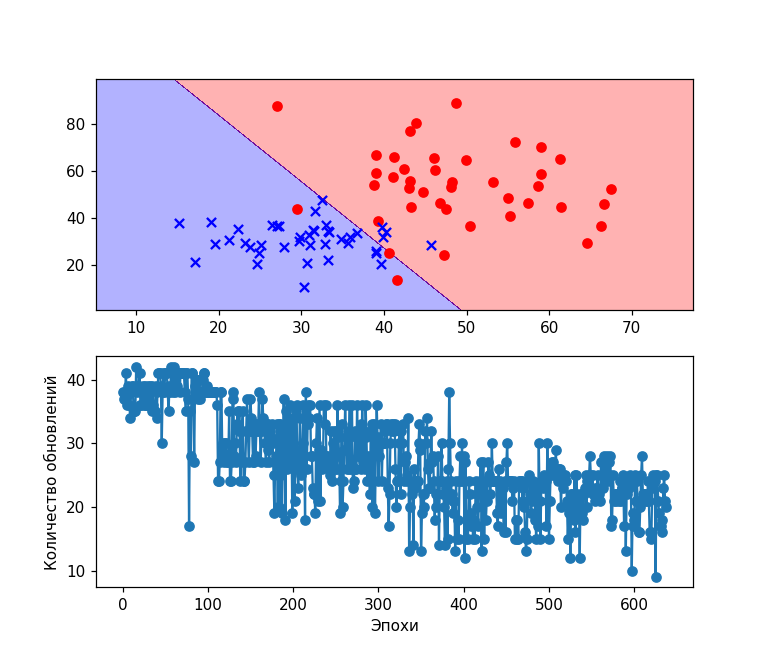

IntSlider(value=1, continuous_update=False, description='Эпох:', max=1000)

In [90]:

fig, axs = plt.subplots(2, 1, figsize=(7, 6))
iSlider = IntSlider(
    value=1, # Первоначальное значение
    min=0,     # Минимум
    max=1000,  # Максимум
    step=1,  # Шаг изменения
    description='Эпох:',
    continuous_update=False, #False,  # True - событие observe возникает для каждого шага при изменении значения
    orientation='horizontal'  # Горизонтальное или вертикальное расположение
)
iSlider.observe(lambda i: draw_graph(X_train,y_train, i['new']), names='value')
display(iSlider)